MSE for custom model is  2572969092.660074
MSE for Sklearn model is: 2308208284.2185354


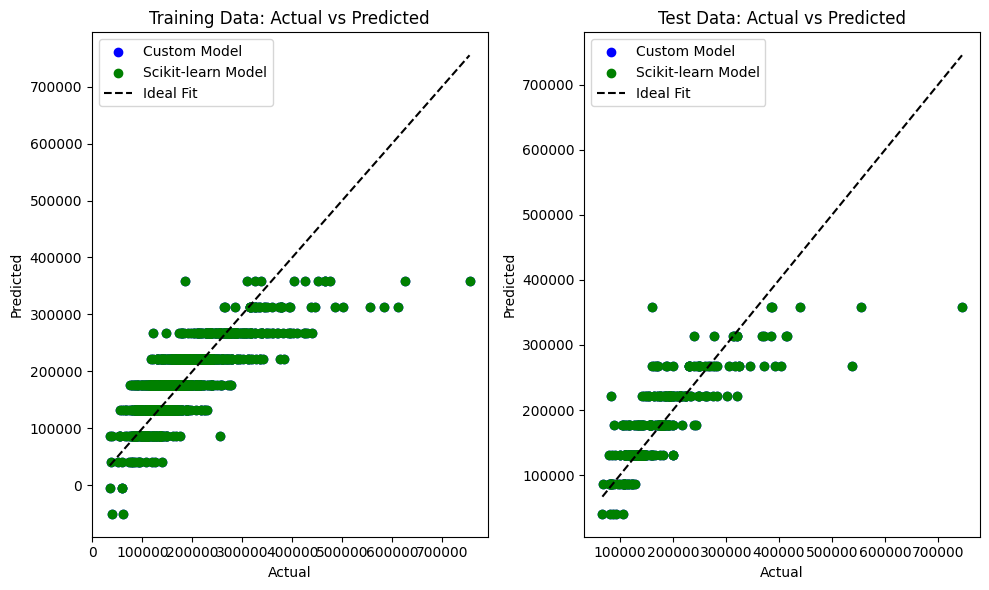

In [12]:
#Question1 : Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
file_name = 'train.csv'
df = pd.read_csv(file_name)
df = df[['OverallQual', 'SalePrice']]

# Define features and target
X = df[['OverallQual']]  # Reshape to 2D for sklearn
y = df['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Custom Linear Regression Model
def least_squares(x, y):
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x**2)
    sum_xy = np.sum(x * y)

    # Calculate slope (m)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_xx - sum_x**2)

    # Calculate intercept (b)
    b = (sum_y - m * sum_x) / N

    return b, m

# Train custom model
b0, b1 = least_squares(X_train['OverallQual'].values, y_train.values)
y_train_pred_custom = b1 * X_train['OverallQual'].values + b0
y_test_pred_custom = b1 * X_test['OverallQual'].values + b0

#MSE for custom Model
def mse(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  return np.mean((y_true - y_pred) ** 2)

print('MSE for custom model is ',mse(y_test,y_test_pred_custom))


# Train sklearn model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_train_pred_sklearn = model_sklearn.predict(X_train)
y_test_pred_sklearn = model_sklearn.predict(X_test)

plt.figure(figsize=(10, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_custom, color='blue', label='Custom Model')
plt.scatter(y_train, y_train_pred_sklearn, color='green', label='Scikit-learn Model')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--', label='Ideal Fit')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

from sklearn.metrics import mean_squared_error


# Scikit-learn Model MSE
mse_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)


print(f"MSE for Sklearn model is: {mse_sklearn}")


# Plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_custom, color='blue', label='Custom Model')
plt.scatter(y_test, y_test_pred_sklearn, color='green', label='Scikit-learn Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', label='Ideal Fit')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.tight_layout()
plt.show()


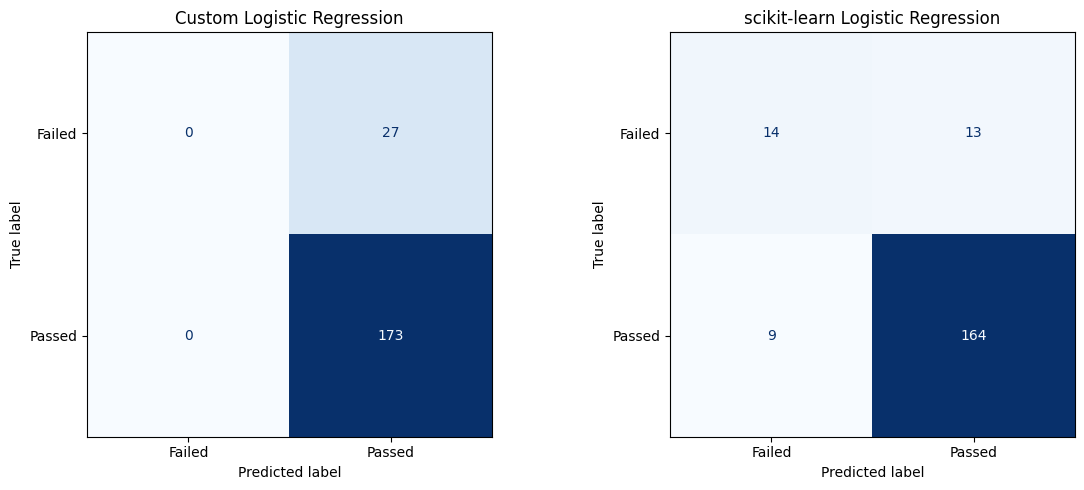

Custom Logistic Regression Metrics:
Accuracy: 0.86
Precision: 0.86
Recall: 1.00
F1 Score: 0.93

Scikit-learn Logistic Regression Metrics:
Accuracy: 0.89
Precision: 0.93
Recall: 0.95
F1 Score: 0.94


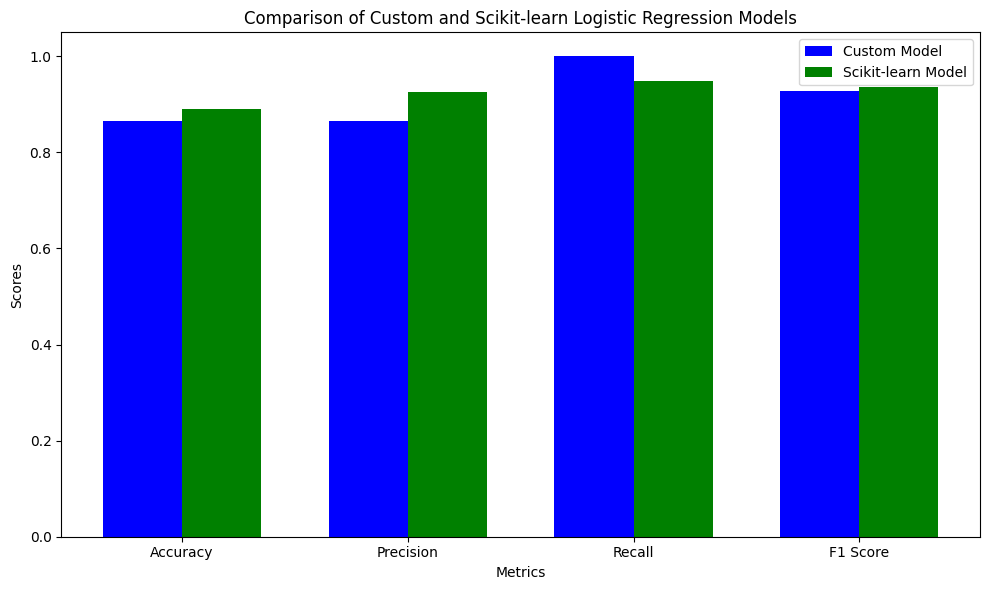

In [3]:
#Question2 : Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
file_name = 'StudentsPerformance.csv'
df = pd.read_csv(file_name)
df['PassedMath'] = [1 if score >= 50 else 0 for score in df['math score']]
df = df[['reading score', 'PassedMath']]
X = df[['reading score']]  # Reshape to 2D for sklearn
y = df['PassedMath']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Custom Logistic Regression Model
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the model using gradient descent."""
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get probabilities
            predictions = self.sigmoid(linear_model)
            # Compute gradients
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self

    def predict(self, X):
        """Predict class labels for samples in X."""
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if p >= 0.5 else 0 for p in predictions]

    def predict_proba(self, X):
        """Predict probabilities for samples in X."""
        linear_model = np.dot(X, self.weights) + self.bias
        prob_class_1 = self.sigmoid(linear_model)
        prob_class_0 = 1 - prob_class_1
        return np.column_stack((prob_class_0, prob_class_1))

# Train custom model
model_custom = LogisticRegressionCustom(learning_rate=0.01, epochs=1000)
model_custom.fit(X_train.values, y_train.values)

# Make predictions
y_train_pred_custom = model_custom.predict(X_train.values)
y_test_pred_custom = model_custom.predict(X_test.values)

# Compute confusion matrix for custom model
cm_custom = confusion_matrix(y_test, y_test_pred_custom)

# Train scikit-learn model
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)

# Make predictions
y_train_pred_sklearn = model_sklearn.predict(X_train)
y_test_pred_sklearn = model_sklearn.predict(X_test)

# Compute confusion matrix for scikit-learn model
cm_sklearn = confusion_matrix(y_test, y_test_pred_sklearn)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot custom model confusion matrix
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=['Failed', 'Passed'])
disp_custom.plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title('Custom Logistic Regression')

# Plot scikit-learn model confusion matrix
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn, display_labels=['Failed', 'Passed'])
disp_sklearn.plot(ax=ax[1], cmap='Blues', colorbar=False)
ax[1].set_title('scikit-learn Logistic Regression')

# Adjust layout
plt.tight_layout()
plt.show()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Custom Model Metrics
accuracy_custom = accuracy_score(y_test, y_test_pred_custom)
precision_custom = precision_score(y_test, y_test_pred_custom)
recall_custom = recall_score(y_test, y_test_pred_custom)
f1_custom = f1_score(y_test, y_test_pred_custom)

# Scikit-learn Model Metrics
accuracy_sklearn = accuracy_score(y_test, y_test_pred_sklearn)
precision_sklearn = precision_score(y_test, y_test_pred_sklearn)
recall_sklearn = recall_score(y_test, y_test_pred_sklearn)
f1_sklearn = f1_score(y_test, y_test_pred_sklearn)

# Display Metrics
print("Custom Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_custom:.2f}")
print(f"Precision: {precision_custom:.2f}")
print(f"Recall: {recall_custom:.2f}")
print(f"F1 Score: {f1_custom:.2f}")

print("\nScikit-learn Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print(f"Precision: {precision_sklearn:.2f}")
print(f"Recall: {recall_sklearn:.2f}")
print(f"F1 Score: {f1_sklearn:.2f}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
custom_values = [accuracy_custom, precision_custom, recall_custom, f1_custom]
sklearn_values = [accuracy_sklearn, precision_sklearn, recall_sklearn, f1_sklearn]

# Bar width
bar_width = 0.35
index = np.arange(len(metrics))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bar1 = ax.bar(index, custom_values, bar_width, label='Custom Model', color='b')
bar2 = ax.bar(index + bar_width, sklearn_values, bar_width, label='Scikit-learn Model', color='g')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Custom and Scikit-learn Logistic Regression Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()